### HYPOTHESIS
1. The Item_MRP (Maximum Retail Price) has an impact on the Item_Outlet_Sales.
2. Outlet_Type has an impact on Item_Outlet_Sales.
3. The Item_Outlet_Sales are influenced by the Outlet_Location_Type.
4. Item_Type has an impact on Item_Outlet_Sales.
5. Outlet_Size has an impact on Item_Outlet_Sales.

1. Better priced things may experience fewer sales due to affordability concerns, 
   whilst lower priced items may experience better sales due to enhanced affordability and customer appeal.
2. Different types of outlets may attract different customer segments, resulting in variations in sales.
3. The location of the outlet may influence the spending power and preferences of local customers, hence influencing sales.
4. Customers health consciousness and dietary choices can influence their purchasing decisions, therefore items labelled "Low Fat" or "Regular" may have differing sales patterns.
5. Different types of products may have varying demand and popularity among customers, leading to differences in sales across item categories.

### Loading Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv(r"C:\Users\HP\Desktop\techocolab\mini project\9961_14084_bundle_archive\train.csv")
df_test = pd.read_csv(r"C:\Users\HP\Desktop\techocolab\mini project\9961_14084_bundle_archive\test.csv")

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [7]:
df_train.shape

(8523, 12)

In [8]:
df_test.shape

(5681, 11)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [13]:
df_train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Exploratory Data Analysis
- Handle Missing value
-  Removing duplicates
-  Outlier Treatment
- Normalizing and Scaling( Numerical Variables)
- Univariate Analysis
- Bivariate Analysis

### Handling Missing values

In [14]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Imputation for missing value 

In [16]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace = True)

In [17]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace = True)

In [18]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace = True)

In [19]:
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace = True)

In [20]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [22]:
# check how many entries have 0
df_train['Item_Visibility'].value_counts().head()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
Name: Item_Visibility, dtype: int64

In [23]:
#we replace the 0 values for NAN values so the mean value is not affected.

In [24]:
 df_train['Item_Visibility'] = df_train['Item_Visibility'].replace({0:np.nan})

In [25]:
df_train['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3         NaN
4         NaN
5         NaN
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

In [26]:
# pivot table with the mean values that will be used to replace the nan values
df = df_train.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
df

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.127519,0.066025,0.069763,0.063000
Breads,0.107172,0.066962,0.065450,0.057083
Breakfast,0.132249,0.080078,0.083165,0.065450
Canned,0.106142,0.067540,0.072232,0.062376
Dairy,0.122944,0.069374,0.070324,0.067568
Frozen Foods,0.107033,0.065310,0.063023,0.063515
Fruits and Vegetables,0.120401,0.067442,0.067224,0.066292
Hard Drinks,0.107030,0.066509,0.065995,0.060225
Health and Hygiene,0.095284,0.053916,0.051457,0.054353


In [27]:
# replace the nan values
# define function that returns the mean values
def find_mean(x):
    return df.loc[x['Item_Type'], x['Outlet_Type']]

# replace missing values in loan_amount with median values
df_train['Item_Visibility'].fillna(df_train[df_train['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

In [28]:
df_train['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3    0.120401
4    0.059544
5    0.069763
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

In [29]:
## check the unique data

In [30]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [31]:
df_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [32]:
df_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [33]:
df_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
df_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [34]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555000,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.070440,0.048885,0.003575,0.033085,0.060700,0.096335,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


In [35]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

### Handling Duplicate records

In [36]:
duplicate = df_train.duplicated()
print(duplicate.sum())
df_train[duplicate]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### Handling outliers

<Axes: xlabel='Item_MRP'>

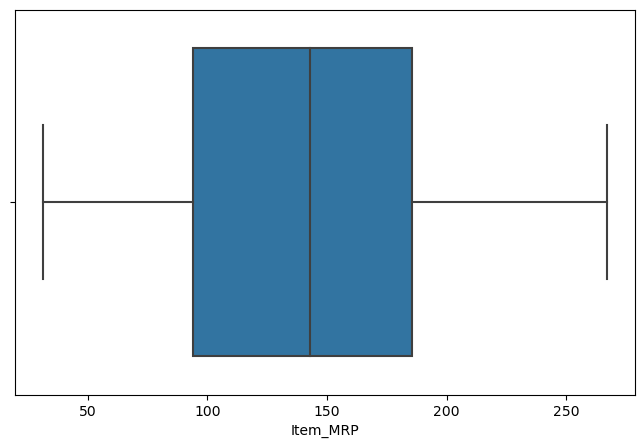

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_train['Item_MRP'])

<Axes: xlabel='Item_Weight'>

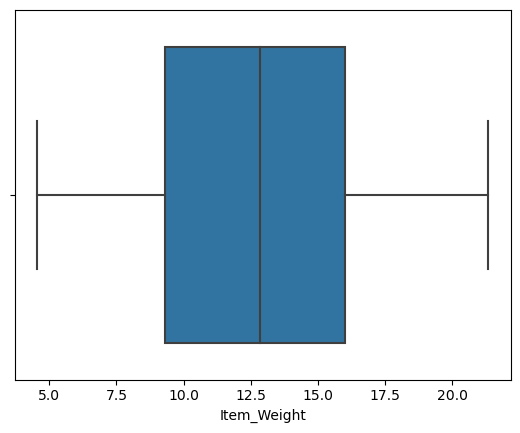

In [38]:
import seaborn as sns
plt.figure()
sns.boxplot(x=df_train['Item_Weight'])

<Axes: xlabel='Item_Outlet_Sales'>

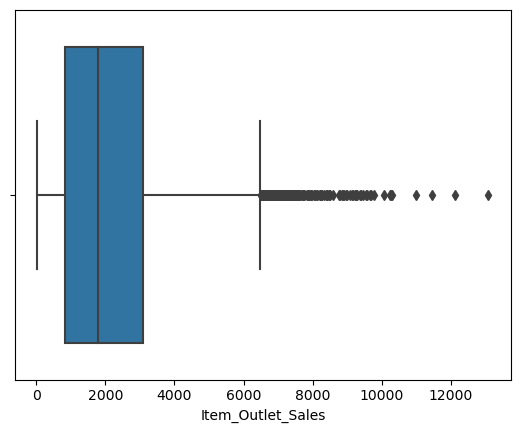

In [39]:
#Box plot for Item_Outlet_Sales to see outliers
plt.figure()
sns.boxplot(x=df_train['Item_Outlet_Sales'])

In [40]:
# Removing Outliers
def outliers(df_train, feature):
    Q1= df_train[feature].quantile(0.25)
    Q3 = df_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df_train, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
df_train = df_train[(df_train['Item_Outlet_Sales'] > lower) & (df_train['Item_Outlet_Sales'] < upper)]

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


<Axes: xlabel='Item_Outlet_Sales'>

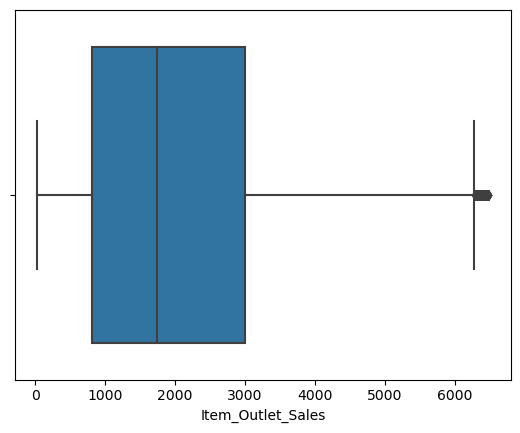

In [41]:
#Box plot for Item_Outlet_Sales to see outliers
plt.figure()
sns.boxplot(x=df_train['Item_Outlet_Sales'])

### Univariate Analysis

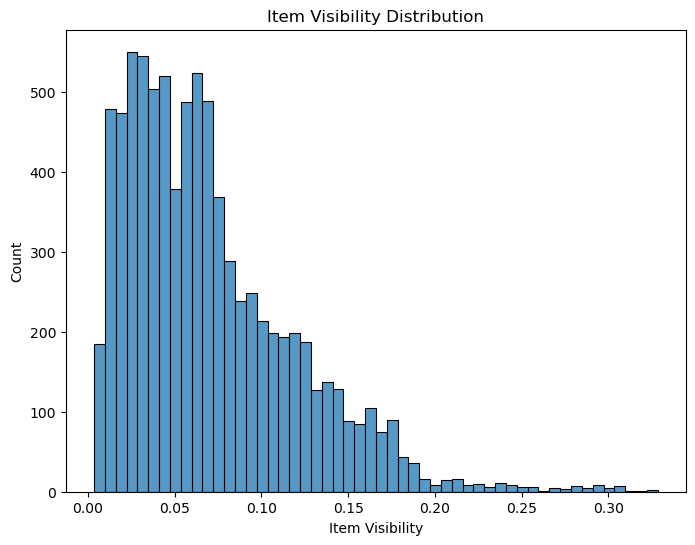

In [42]:
# Histogram of Item_Visibility
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x="Item_Visibility")
plt.title("Item Visibility Distribution")
plt.xlabel("Item Visibility")
plt.ylabel("Count")
plt.show()

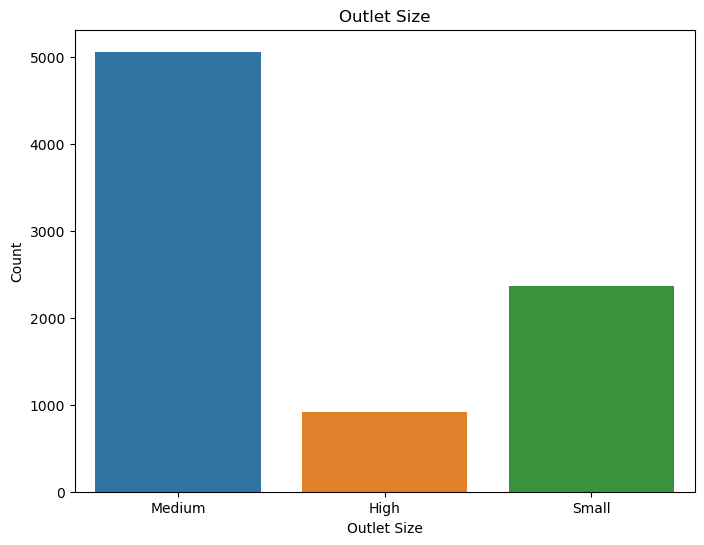

In [43]:
# Count plot of Outlet_Size
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x="Outlet_Size")
plt.title("Outlet Size")
plt.xlabel("Outlet Size")
plt.ylabel("Count")
plt.show()

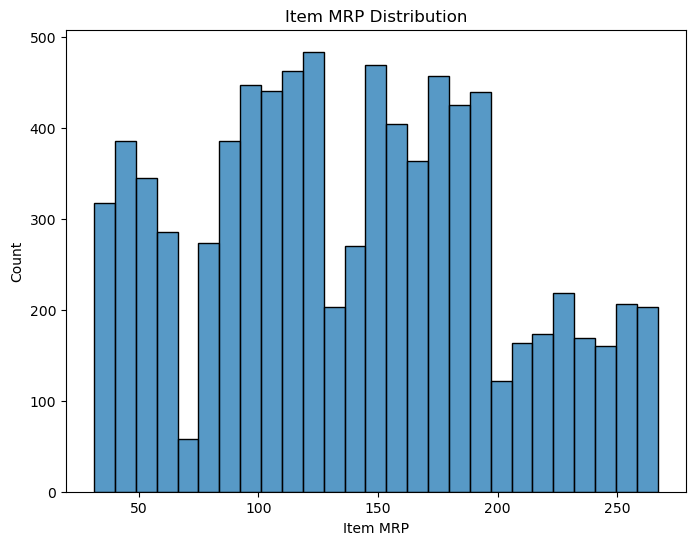

In [44]:
# Histogram of Item_MRP
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x="Item_MRP")
plt.title("Item MRP Distribution")
plt.xlabel("Item MRP")
plt.ylabel("Count")
plt.show()

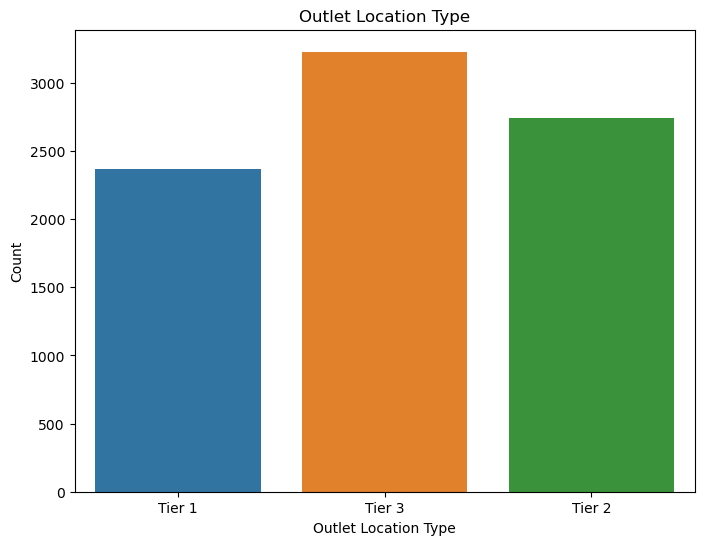

In [45]:
# Count plot of Outlet_Location_Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x="Outlet_Location_Type")
plt.title("Outlet Location Type")
plt.xlabel("Outlet Location Type")
plt.ylabel("Count")
plt.show()

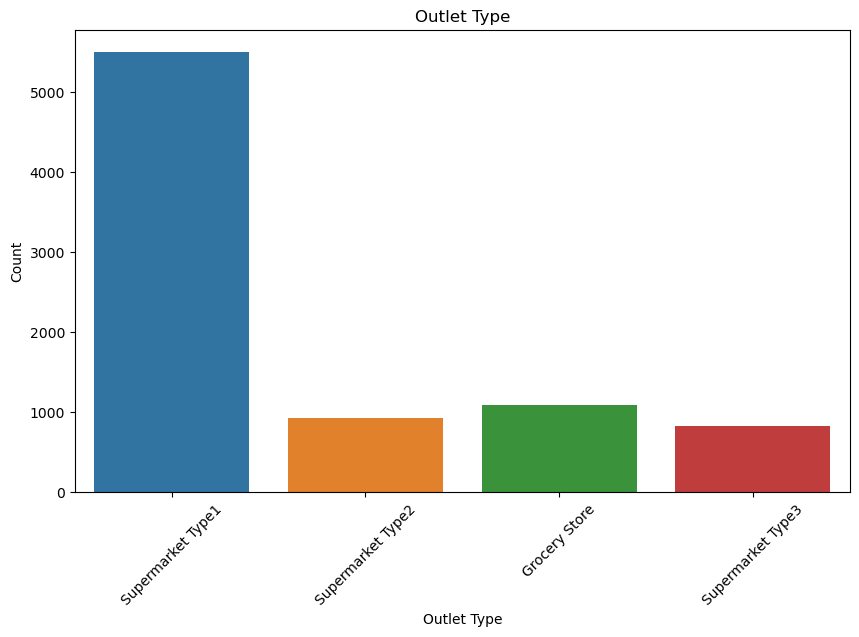

In [46]:
# Count plot of Outlet_Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x="Outlet_Type")
plt.title("Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

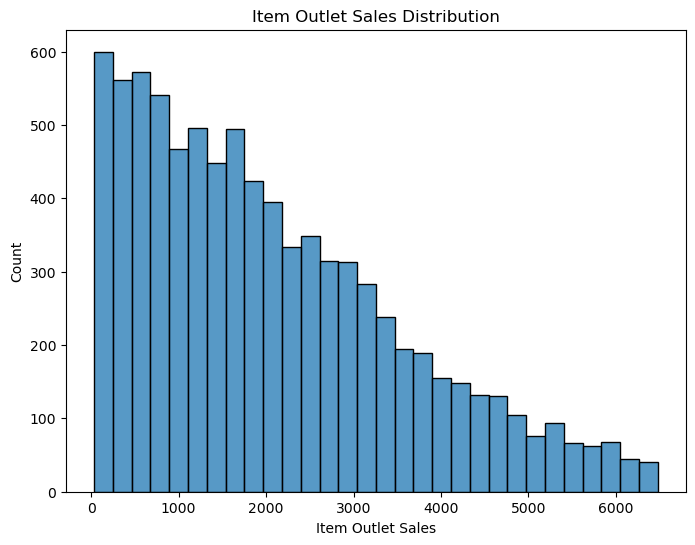

In [47]:
# Histogram of Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x="Item_Outlet_Sales")
plt.title("Item Outlet Sales Distribution")
plt.xlabel("Item Outlet Sales")
plt.ylabel("Count")
plt.show()

### Bivariate Analysis

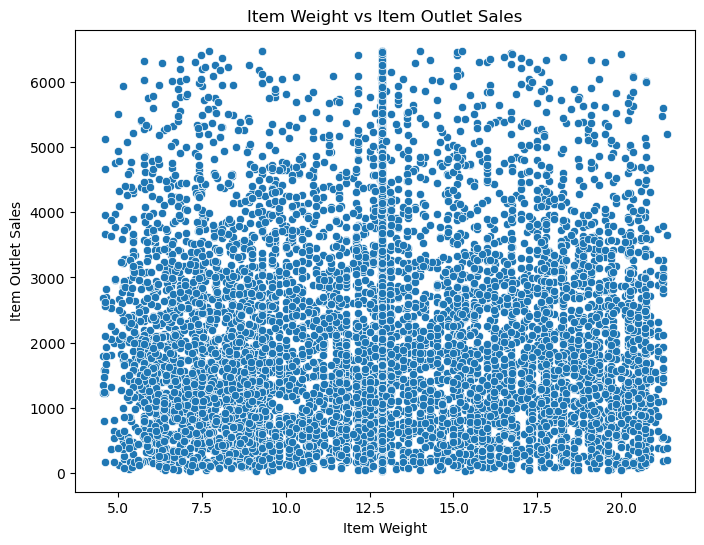

In [48]:
# Scatter plot of Item_Weight vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x="Item_Weight", y="Item_Outlet_Sales")
plt.title("Item Weight vs Item Outlet Sales")
plt.xlabel("Item Weight")
plt.ylabel("Item Outlet Sales")
plt.show()

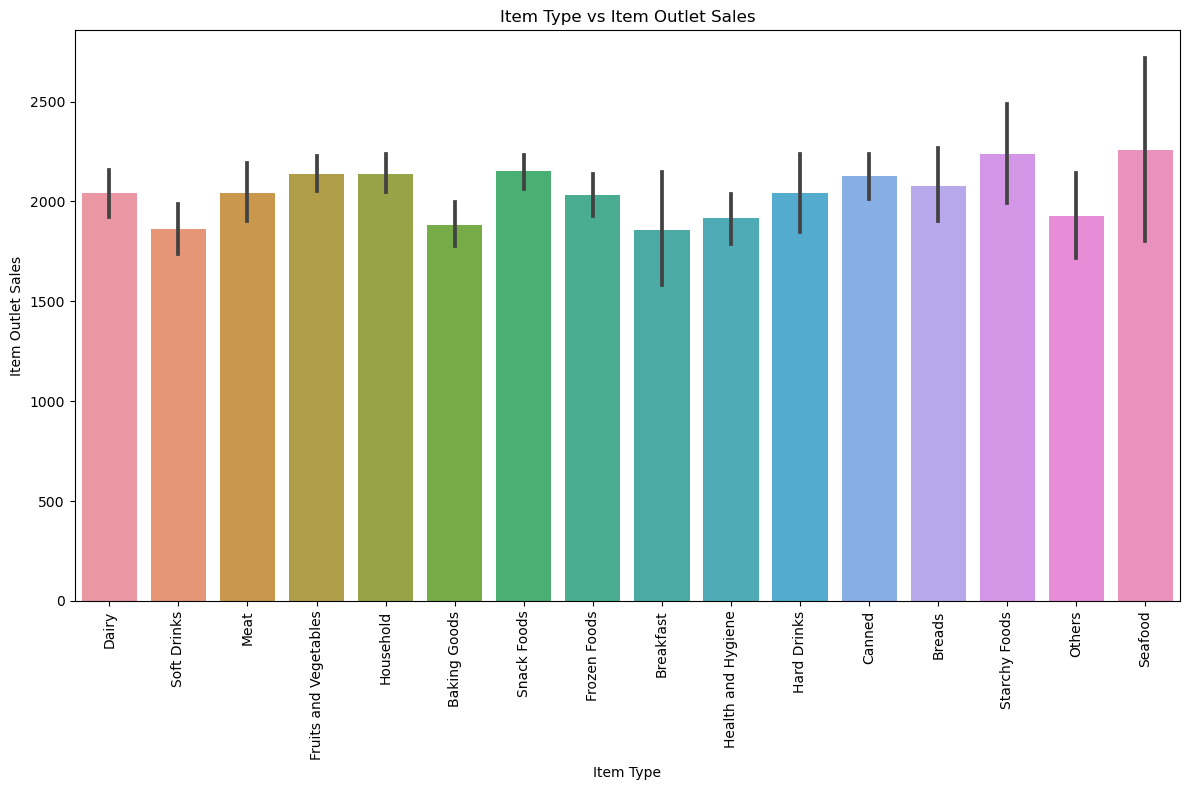

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(data=df_train, x="Item_Type", y="Item_Outlet_Sales")
plt.title("Item Type vs Item Outlet Sales")
plt.xlabel("Item Type")
plt.ylabel("Item Outlet Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [50]:
##################

In [66]:
sales_train = df_train.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)
sales_test = df_test.drop(['Item_Identifier','Outlet_Identifier'], axis = 1)

In [67]:
#Encoding train

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [69]:
df_train['Item_Fat_Content']= le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']= le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']= le.fit_transform(df_train['Outlet_Type'])

In [70]:
# Encoding test

df_test['Item_Fat_Content']= le.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type']= le.fit_transform(df_test['Item_Type'])
df_test['Outlet_Size']= le.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type']= le.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type']= le.fit_transform(df_test['Outlet_Type'])  

In [71]:
sales_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.120401,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.059544,9,53.8614,1987,0,2,1,994.7052


In [72]:
# one hot encoding

# Select the categorical columns for one-hot encoding
#categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Perform one-hot encoding#
#encoded_data = pd.get_dummies(df_train, columns=categorical_columns, drop_first = True)

# View the encoded data
#encoded_data.head()


### Data Preprocessing

In [73]:
##Spliting data by train_test_split

In [74]:
x=sales_train.drop('Item_Outlet_Sales',axis=1)
y=sales_train['Item_Outlet_Sales']

In [75]:
##Scaling Data

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Model Training and Testing

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRFRegressor

In [79]:
lr=LinearRegression()

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

xgb = XGBRFRegressor()

In [80]:
#linear regression

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.4839702106850101

In [81]:
#RandomForestRegressor

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.5280946930930157

In [82]:
#AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=50, learning_rate =.01)
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

0.5204321345413976

In [83]:
xgb = XGBRFRegressor()
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4


0.5741475804506881

In [84]:
#GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
r5

0.5658438740831938

### Final Model

In [85]:
#Model Results

metric_results= {'Model': ['linear Regression', 'RandomForest','AdaBoost','XGb','GradientBoosting'],'R Square': [r1,r2,r3,r4,r5]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.483970
1,RandomForest,0.528095
2,AdaBoost,0.520432
3,XGb,0.574148
4,GradientBoosting,0.565844


In [86]:
prediction = pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
prediction

,actual Outlet Sales,predicted Outlet Sales
8491,4809.7392,3014.313992
2377,5141.3076,3124.626192
526,283.6308,2005.833955
8056,1731.7458,2862.513122
1689,1114.5492,1769.970413
...,...,...
4033,1771.0280,1811.488911
7204,5287.7836,3720.443292
4541,2105.2596,1980.617544
6019,400.8116,118.377855
